In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import json
with open('9505ˇ.json', 'r') as fout:
    udata = json.load(fout)
for i in range(len(udata)):
    print(udata[i])
    
# fin = open('ulist.json', 'r')
# udata = json.load(fin)
# fin.close()

In [3]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
#關於中文編碼的問題http://stackoverflow.com/questions/2688020/how-to-print-chinese-word-in-my-code-using-python
import json
import datetime
import os
import calendar
import re
import operator
from matplotlib.font_manager import FontProperties
if os.name == 'posix':#mac電腦的意思
    fpath = r"PMingLiU.ttf"
else:#windows的電腦用
    fpath = r"PMingLiU.ttf"
font = FontProperties(fname=fpath, size=12)

#關於時間年月日
months = {1:'01', 2:'02', 3:'03', 4:'04', 5:'05', 6:'06', 7:'07', 8:'08', 9:'09', 10:'10', 11:'11', 12:'12'}
monthsdays = {1:'31', 2:'28', 3:'31', 4:'30', 5:'31', 6:'30', 7:'31', 8:'31', 9:'30', 10:'31', 11:'30', 12:'31'}
monthsdays2 = monthsdays.copy()#http://stackoverflow.com/questions/2465921/how-to-copy-a-dictionary-and-only-edit-the-copy
monthsdays2[2] = '29'#monthsdays2 = {1:31, 2:29, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}

fmt = '%Y.%m.%d'
d = datetime.datetime.today()#http://stackoverflow.com/questions/4998629/python-split-string-with-multiple-delimiters\
year = int(re.split('[.]', d.strftime(fmt))[0]) -1911
month = re.split('[.]', d.strftime(fmt))[1]
day = re.split('[.]', d.strftime(fmt))[2]
months = {1:'01', 2:'02', 3:'03', 4:'04', 5:'05', 6:'06', 7:'07', 8:'08', 9:'09', 10:'10', 11:'11', 12:'12'}

data_list = []
for i in range(85, year+1):
    if i == 105:
        for m in range(1, 6):
            data_list.append(str(i)+months[m]+'.json')
    elif i != 105:
        for m in range(1, 13):
            data_list.append(str(i)+months[m]+'.json')

台北一 9331


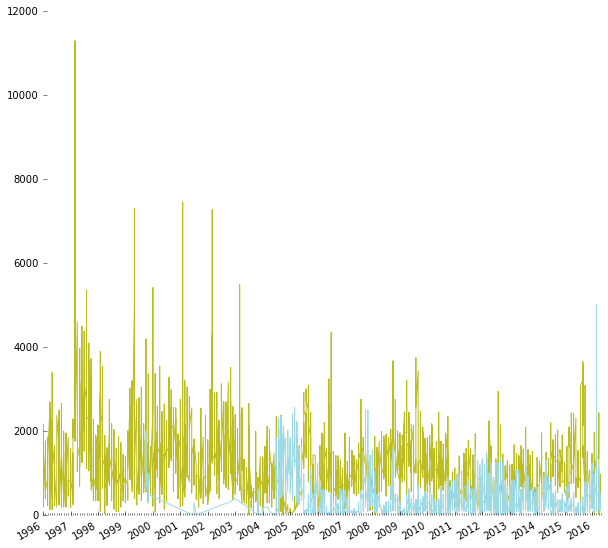

台北二 6968


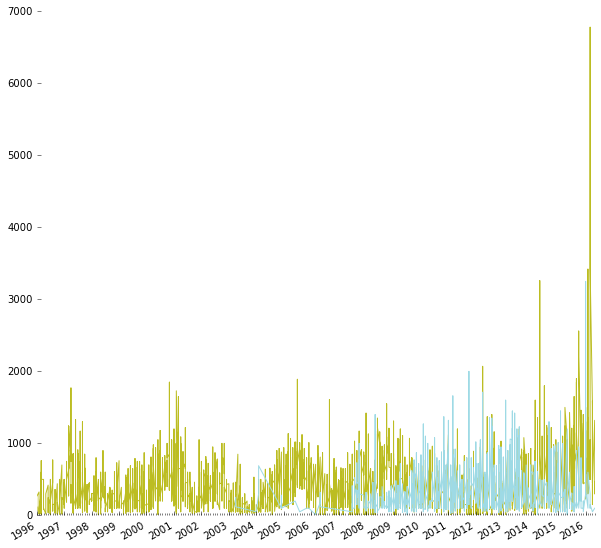

台中市 4165


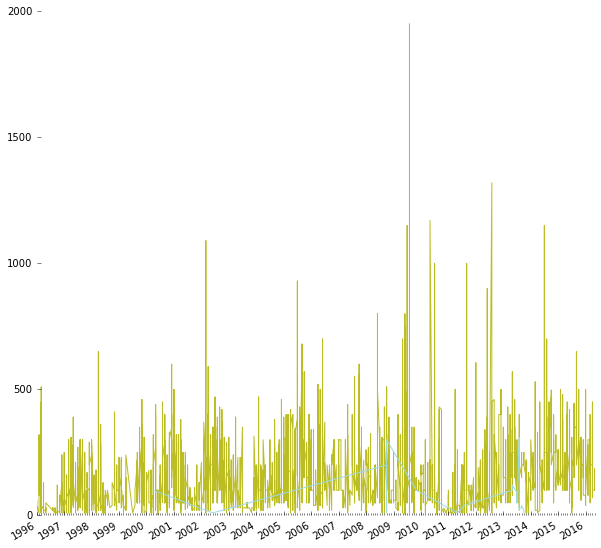

三重市 2471


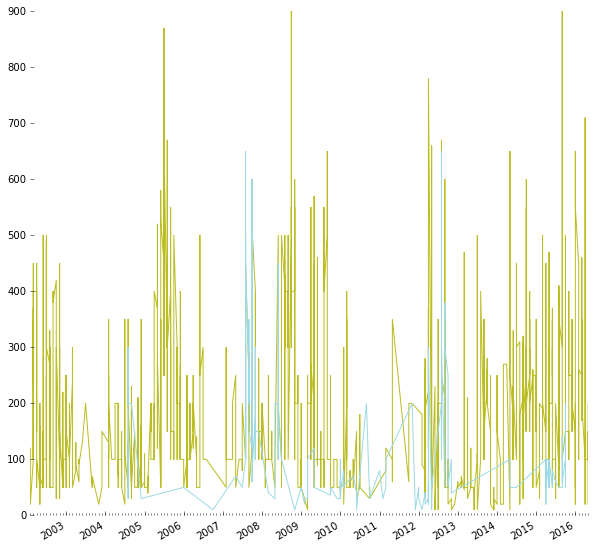

桃園縣 248


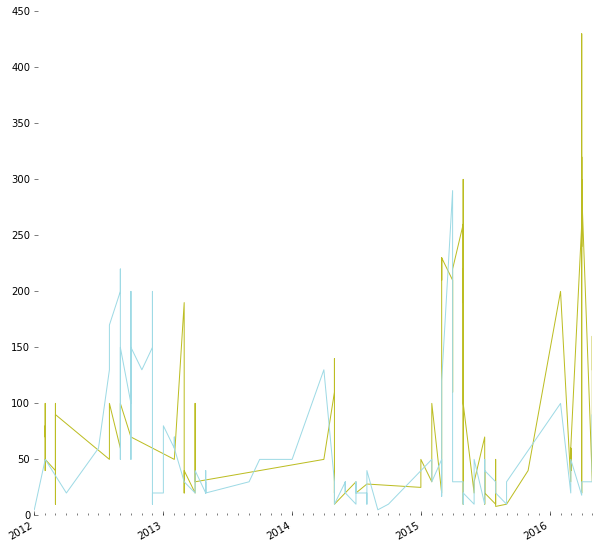

屏東市 2955


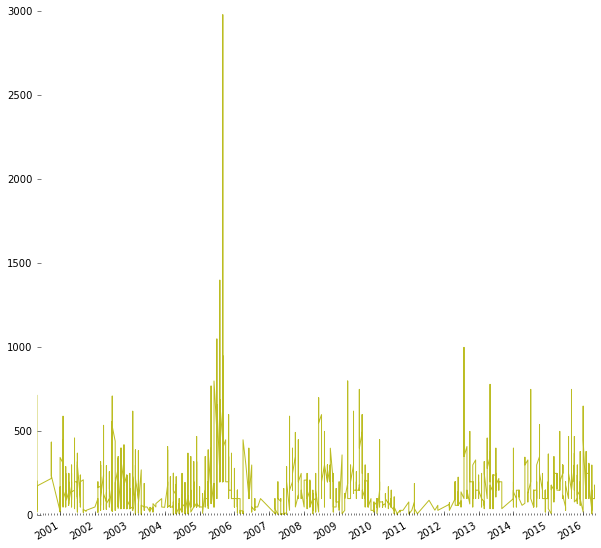

高雄市 7978


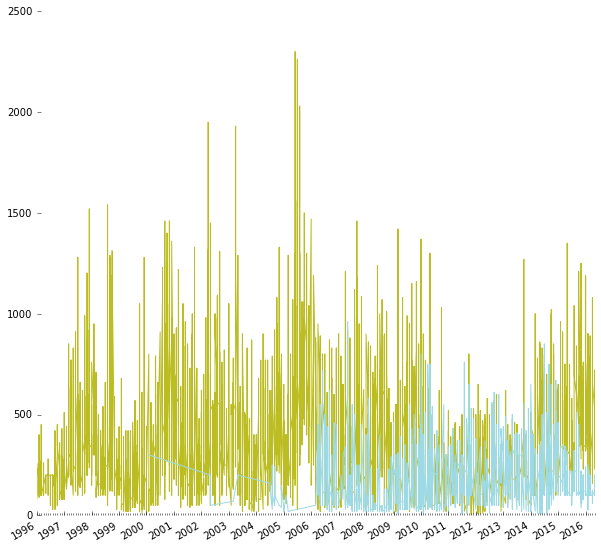

鳳山市 1851


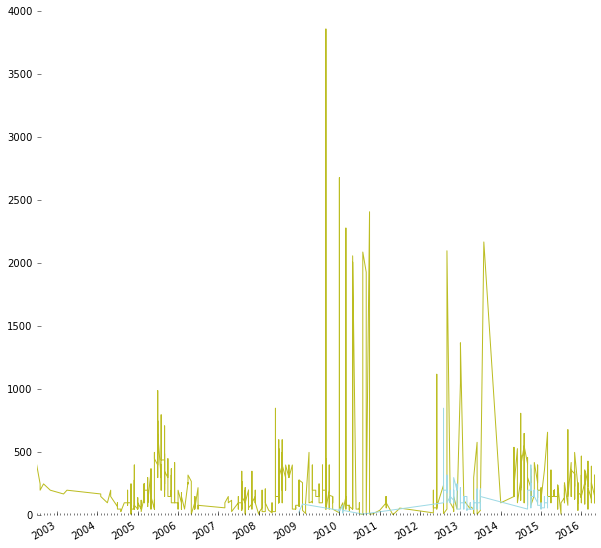

花蓮市 1483


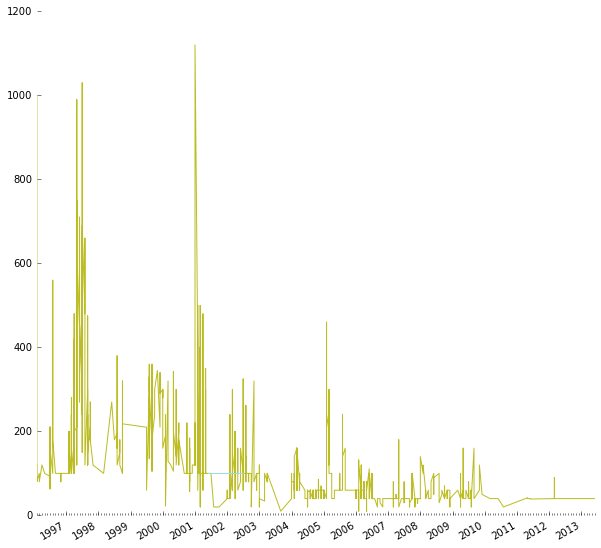

In [13]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

#每個批發市場的交易情形，算月
%matplotlib inline
import os
import csv
import datetime
import collections
from itertools import islice
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
class SortedDisplayDict(dict):#http://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key
   def __str__(self):
       return "{" + ", ".join("%r: %r" % (key, self[key]) for key in sorted(self)) + "}"
#設定資料
dat_dic = {}
title = ['crs', 'mas', 'dat', 'pru', 'pro', 'prd', 'prm', 'trv']
months = {1:'01', 2:'02', 3:'03', 4:'04', 5:'05', 6:'06', 7:'07', 8:'08', 9:'09', 10:'10', 11:'11', 12:'12'}
url = 'pro_pla_price/month_data.csv'
with open(url, 'r') as fin:
    AQdata = fin.read()
market = {'104':'台北二', '109':'台北一', '241':'三重市', '260':'宜蘭市', '420':'豐原鄉', '512':'永靖鄉', '514':'溪湖鎮', '540':'南投市', '648':'西螺鎮', '900':'屏東市', '400':'台中市', '800':'高雄市', '830':'鳳山市', '338':'桃園縣', '930':'台東市', '950':'花蓮市'}
market_data = market.copy()
for num in market_data.keys():
    market_data[num] = []
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']
#字型設定
if os.name == 'posix':#mac電腦的意思
    fpath = r"NotoSansCJKtc-Regular.otf"
else:#windows的電腦用
    fpath = r"NotoSansCJKtc-Regular.otf"

##資料建立
for data in data_list:
    with open(data, 'r') as fout:
        udata = json.load(fout)
    for data in udata:
        if data['crs'] != 'rest':#不載入休市資料
            littletime = datetime.date(int(data['dat'].split('.')[0])+1911, int(data['dat'].split('.')[1]), int(data['dat'].split('.')[2]))
            market_data[data['mas']].append({'dat':littletime, 'pru':data['pru'], 'pro':data['pro'], 'prd':data['prd'], 'prm':data['prm'], 'trv':data['trv'], 'cro':data['cro']})
for i in market_data.keys():#資料排序
    if len(market_data[i]) > 0:
        market_data[i].sort(key=operator.itemgetter('dat'))
for i in market_data.keys():
    if len(market_data[i]) > 0:
        for data in market_data[i]:
            data['dat'] = datetime.datetime.strftime(data['dat'], '%Y.%m')

for i in market_data.keys():
    if len(market_data[i]) > 0:
        for data in market_data[i]:
            if data['dat'] not in dat_dic.keys():
                dat_dic[data['dat']] = []

for i in market.keys():
    if len(market_data[i]) > 0:#不是空資料者才列印
        print(market[i], len(market_data[i]))#先印出名稱
        time_native_temp = []
        trv_native_temp = []
        time_import_temp = []
        trv_import_temp = []
        for x in market_data[i]:
            for j in dat_dic.keys():
                if x['cro'] == '牛蒡':
                    if x['dat'] == j:
                        time_native_temp.append(md.date2num(datetime.datetime.strptime(x['dat'], '%Y.%m')))
                        trv_native_temp.append(x['trv'])
                if x['cro'] == '牛蒡-進口':
                    if x['dat'] == j:
                        time_import_temp.append(md.date2num(datetime.datetime.strptime(x['dat'], '%Y.%m')))
                        trv_import_temp.append(x['trv'])
        ##畫出線條
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        ax.plot_date(time_native_temp, trv_native_temp, '-', color = '#bcbd22')
        ax.plot_date(time_import_temp, trv_import_temp, '-', color = '#9edae5')
        #移除一些不必要的東西
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ##繪製圖表
        years = YearLocator()   # every year
        months = MonthLocator()  # every month
        yearsFmt = DateFormatter('%Y')
        ax.xaxis.set_major_locator(years)#設定大年份
        ax.xaxis.set_major_formatter(yearsFmt)
        ax.xaxis.set_minor_locator(months)
        ax.autoscale_view()
        ##顯示圖表
        fig.autofmt_xdate()
        plt.show()
        plt.close()

台北一 9331


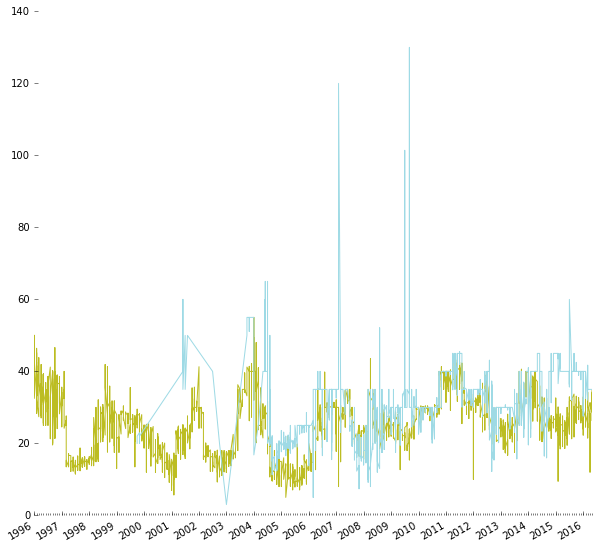

台北二 6968


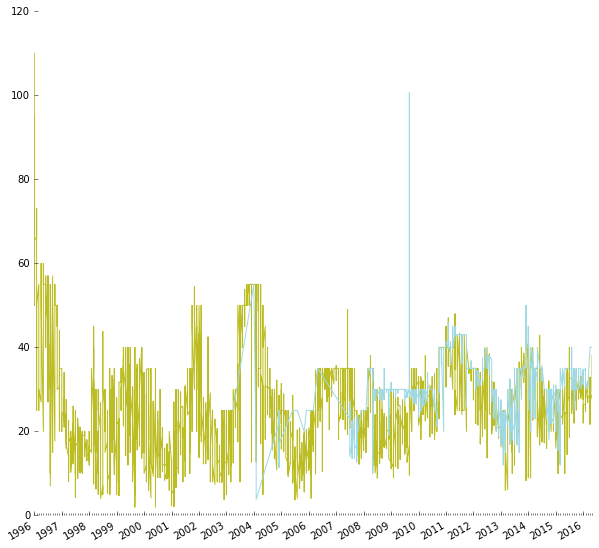

台中市 4165


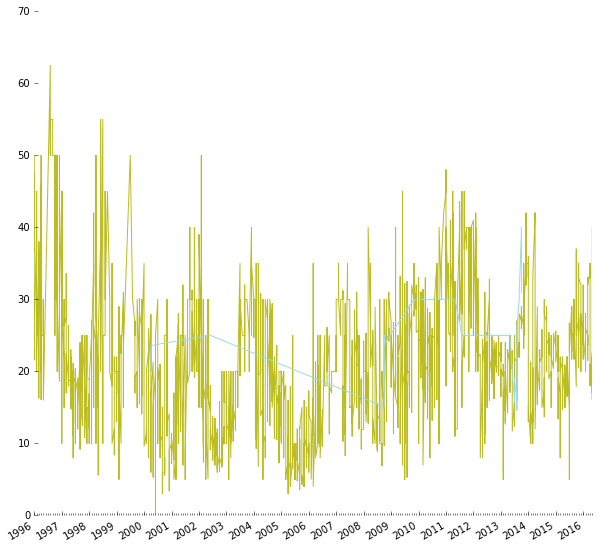

三重市 2471


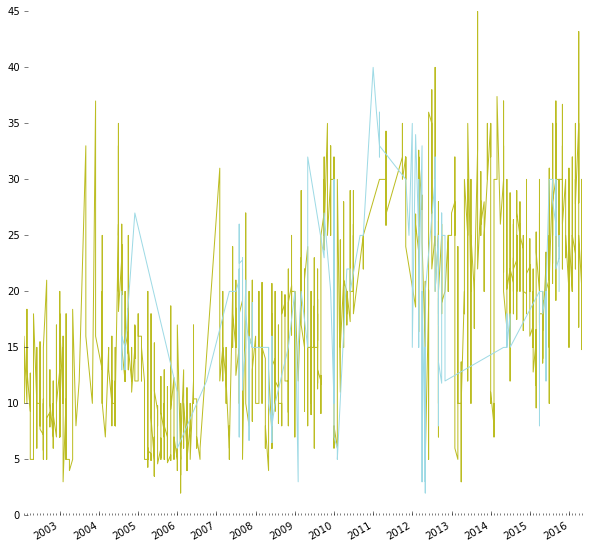

桃園縣 248


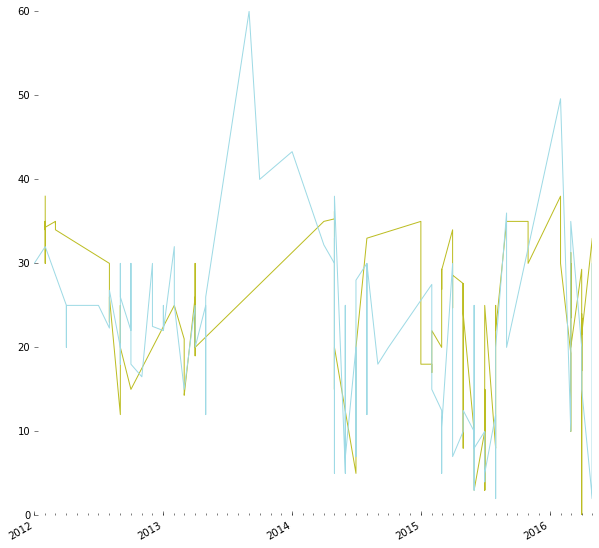

屏東市 2955


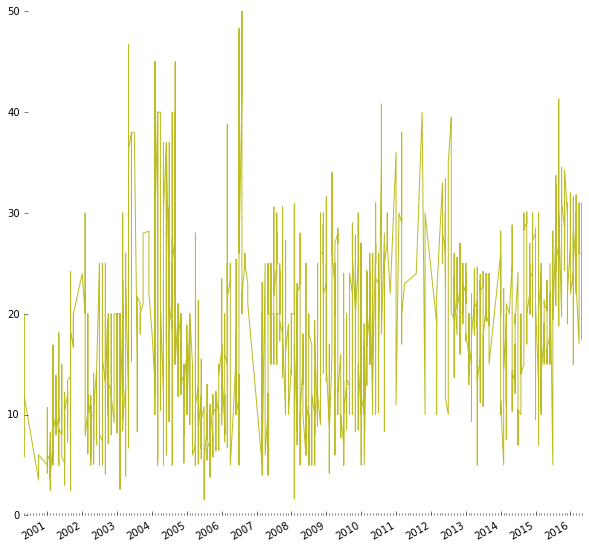

高雄市 7978


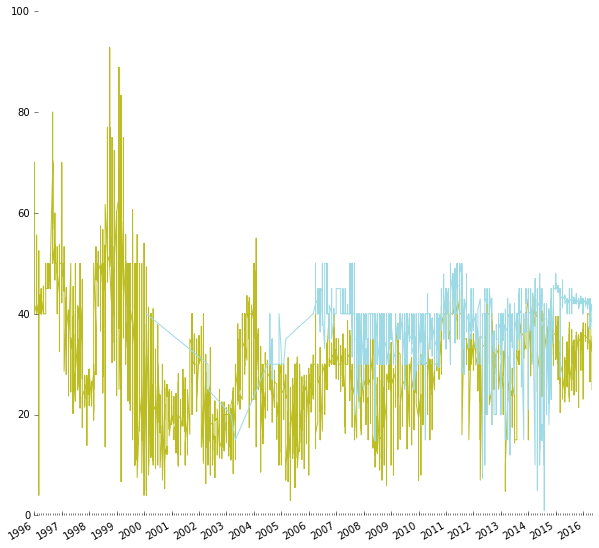

鳳山市 1851


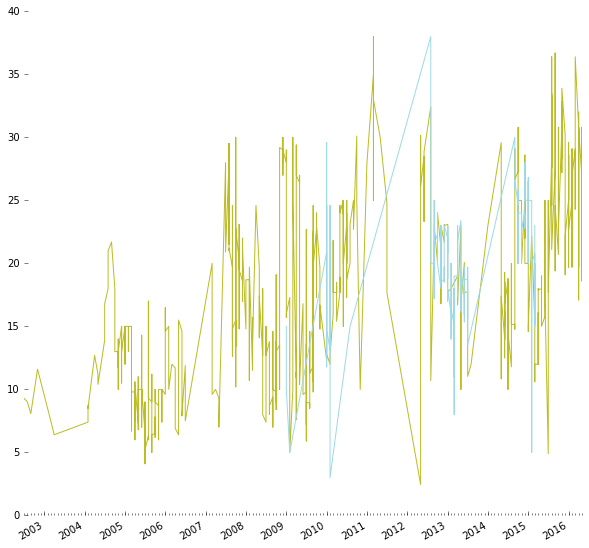

花蓮市 1483


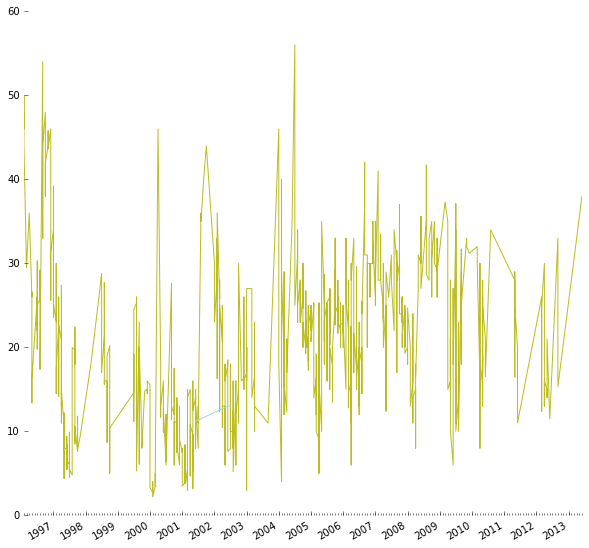

In [14]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

#個別市場的價格情形，算月
%matplotlib inline
import os
import csv
import datetime
import collections
from itertools import islice
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
class SortedDisplayDict(dict):#http://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key
   def __str__(self):
       return "{" + ", ".join("%r: %r" % (key, self[key]) for key in sorted(self)) + "}"
#設定資料
dat_dic = {}
title = ['crs', 'mas', 'dat', 'pru', 'pro', 'prd', 'prm', 'trv']
months = {1:'01', 2:'02', 3:'03', 4:'04', 5:'05', 6:'06', 7:'07', 8:'08', 9:'09', 10:'10', 11:'11', 12:'12'}
url = 'pro_pla_price/month_data.csv'
with open(url, 'r') as fin:
    AQdata = fin.read()
market = {'104':'台北二', '109':'台北一', '241':'三重市', '260':'宜蘭市', '420':'豐原鄉', '512':'永靖鄉', '514':'溪湖鎮', '540':'南投市', '648':'西螺鎮', '900':'屏東市', '400':'台中市', '800':'高雄市', '830':'鳳山市', '338':'桃園縣', '930':'台東市', '950':'花蓮市'}
market_data = market.copy()
for num in market_data.keys():
    market_data[num] = []
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']
#字型設定
if os.name == 'posix':#mac電腦的意思
    fpath = r"NotoSansCJKtc-Regular.otf"
else:#windows的電腦用
    fpath = r"NotoSansCJKtc-Regular.otf"

##資料建立
for data in data_list:
    with open(data, 'r') as fout:
        udata = json.load(fout)
    for data in udata:
        if data['crs'] != 'rest':#不載入休市資料
            littletime = datetime.date(int(data['dat'].split('.')[0])+1911, int(data['dat'].split('.')[1]), int(data['dat'].split('.')[2]))
            market_data[data['mas']].append({'dat':littletime, 'pru':data['pru'], 'pro':data['pro'], 'prd':data['prd'], 'prm':data['prm'], 'trv':data['trv'], 'cro':data['cro']})
for i in market_data.keys():#資料排序
    if len(market_data[i]) > 0:
        market_data[i].sort(key=operator.itemgetter('dat'))
for i in market_data.keys():
    if len(market_data[i]) > 0:
        for data in market_data[i]:
            data['dat'] = datetime.datetime.strftime(data['dat'], '%Y.%m')

for i in market_data.keys():
    if len(market_data[i]) > 0:
        for data in market_data[i]:
            if data['dat'] not in dat_dic.keys():
                dat_dic[data['dat']] = []

for i in market.keys():
    if len(market_data[i]) > 0:#不是空資料者才列印
        print(market[i], len(market_data[i]))#先印出名稱
        time_native_temp = []
        prm_native_temp = []
        time_import_temp = []
        prm_import_temp = []
        for x in market_data[i]:
            for j in dat_dic.keys():
                if x['cro'] == '牛蒡':
                    if x['dat'] == j:
                        time_native_temp.append(md.date2num(datetime.datetime.strptime(x['dat'], '%Y.%m')))
                        prm_native_temp.append(x['prm'])
                if x['cro'] == '牛蒡-進口':
                    if x['dat'] == j:
                        time_import_temp.append(md.date2num(datetime.datetime.strptime(x['dat'], '%Y.%m')))
                        prm_import_temp.append(x['prm'])
        ##畫出線條
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        ax.plot_date(time_native_temp, prm_native_temp, '-', color = '#bcbd22')
        ax.plot_date(time_import_temp, prm_import_temp, '-', color = '#9edae5')
        #移除一些不必要的東西
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ##繪製圖表
        years = YearLocator()   # every year
        months = MonthLocator()  # every month
        yearsFmt = DateFormatter('%Y')
        ax.xaxis.set_major_locator(years)#設定大年份
        ax.xaxis.set_major_formatter(yearsFmt)
        ax.xaxis.set_minor_locator(months)
        ax.autoscale_view()
        ##顯示圖表
        fig.autofmt_xdate()
        plt.show()
        plt.close()

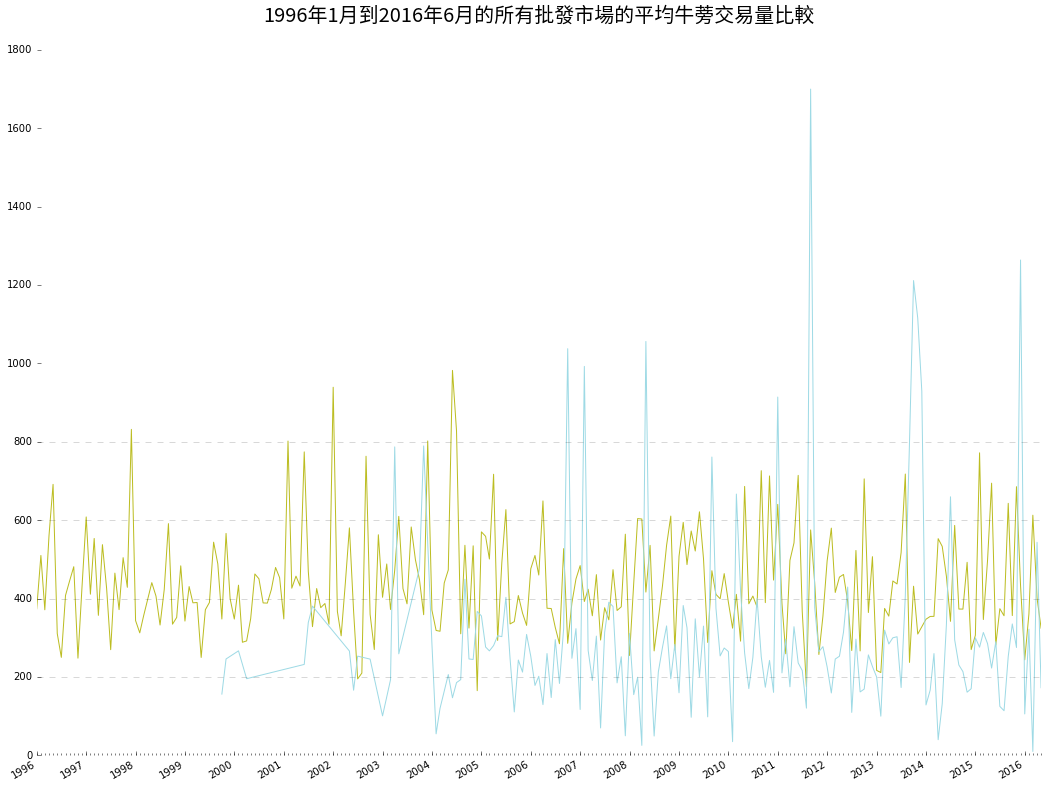

In [24]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

#所有市場的「平均交易」量圖表
%matplotlib inline
import numpy
import collections
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
class SortedDisplayDict(dict):#http://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key
   def __str__(self):
       return "{" + ", ".join("%r: %r" % (key, self[key]) for key in sorted(self)) + "}"
market = {'104':'台北二', '109':'台北一', '241':'三重市', '260':'宜蘭市', '420':'豐原鄉', '512':'永靖鄉', '514':'溪湖鎮', '540':'南投市', '648':'西螺鎮', '900':'屏東市', '400':'台中市', '800':'高雄市', '830':'鳳山市', '338':'桃園縣', '930':'台東市', '950':'花蓮市'}
market_data = market.copy()
for num in market_data.keys():
    market_data[num] = []

for data in data_list:
    with open(data, 'r') as fout:
        udata = json.load(fout)
    for data in udata:
        if data['crs'] != 'rest':#不載入休市資料
            littletime = datetime.date(int(data['dat'].split('.')[0])+1911, int(data['dat'].split('.')[1]), int(data['dat'].split('.')[2]))
            market_data[data['mas']].append({'dat':littletime, 'pru':data['pru'], 'pro':data['pro'], 'prd':data['prd'], 'prm':data['prm'], 'trv':data['trv'], 'cro':data['cro']})
for i in market_data.keys():#資料排序
    if len(market_data[i]) > 0:
        market_data[i].sort(key=operator.itemgetter('dat'))
for i in market_data.keys():
    if len(market_data[i]) > 0:
        for data in market_data[i]:
            data['dat'] = datetime.datetime.strftime(data['dat'], '%Y.%m')

##個別市場的不同天的「交易量」圖表
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')

##資料擷取
dat_native_list = []
dat_native_dic = {}
dat_import_list = []
dat_import_dic = {}
for i in market.keys():#先處理日期的問題
    if len(market_data[i]) > 0:#不是空資料者才列印
        for data in market_data[i]:
            if data['cro'] == '牛蒡' and data['dat'] not in dat_native_list:
                dat_native_list.append(data['dat'])
                dat_native_dic[data['dat']] = []
            if data['cro'] == '牛蒡-進口' and data['dat'] not in dat_import_list:
                dat_import_list.append(data['dat'])
                dat_import_dic[data['dat']] = []
dat_native_dic = SortedDisplayDict(dat_native_dic)
dat_import_dic = SortedDisplayDict(dat_import_dic)#http://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key

for i in market.keys():
    if len(market_data[i]) > 0:
        for data in market_data[i]:
            if data['cro'] == '牛蒡':
                dat_native_dic[data['dat']].append(float(data['trv']))
            if data['cro'] == '牛蒡-進口':
                dat_import_dic[data['dat']].append(float(data['trv']))

time_native_temp = []
trv_native_temp = []
time_import_temp = []
trv_import_temp = []
for i, j in dat_native_dic.items():
    time_native_temp.append(md.date2num(datetime.datetime.strptime(i, '%Y.%m')))
    trv_native_temp.append(float(numpy.mean(j)))
for i, j in dat_import_dic.items():
    time_import_temp.append(md.date2num(datetime.datetime.strptime(i, '%Y.%m')))
    trv_import_temp.append(float(numpy.mean(j)))
time_native_temp.sort()
time_import_temp.sort()
maxdata = int(max(trv_native_temp))

##畫出線條
fig, ax = plt.subplots(1, 1, figsize=(18, 14))
ax.plot_date(time_native_temp, trv_native_temp, '-', color = '#bcbd22')
ax.plot_date(time_import_temp, trv_import_temp, '-', color = '#9edae5')
plt.title('1996年1月到2016年6月的所有批發市場的平均牛蒡交易量比較\n', fontproperties=FontProperties(fname=fpath, size=20), ha='center')#繪製圖片的標題#http://matplotlib.org/examples/pylab_examples/fonts_demo.html
#繪製格線方便使用者看
for y in range(0, maxdata, 200):
    plt.plot(time_native_temp, [y] * len(time_native_temp), '--', lw=0.5, color='black', alpha=0.3)
#移除一些不必要的東西
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
##繪製圖表
ax.xaxis.set_major_locator(years)#設定大年份
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
##顯示圖表
fig.autofmt_xdate()
plt.show()
plt.close()

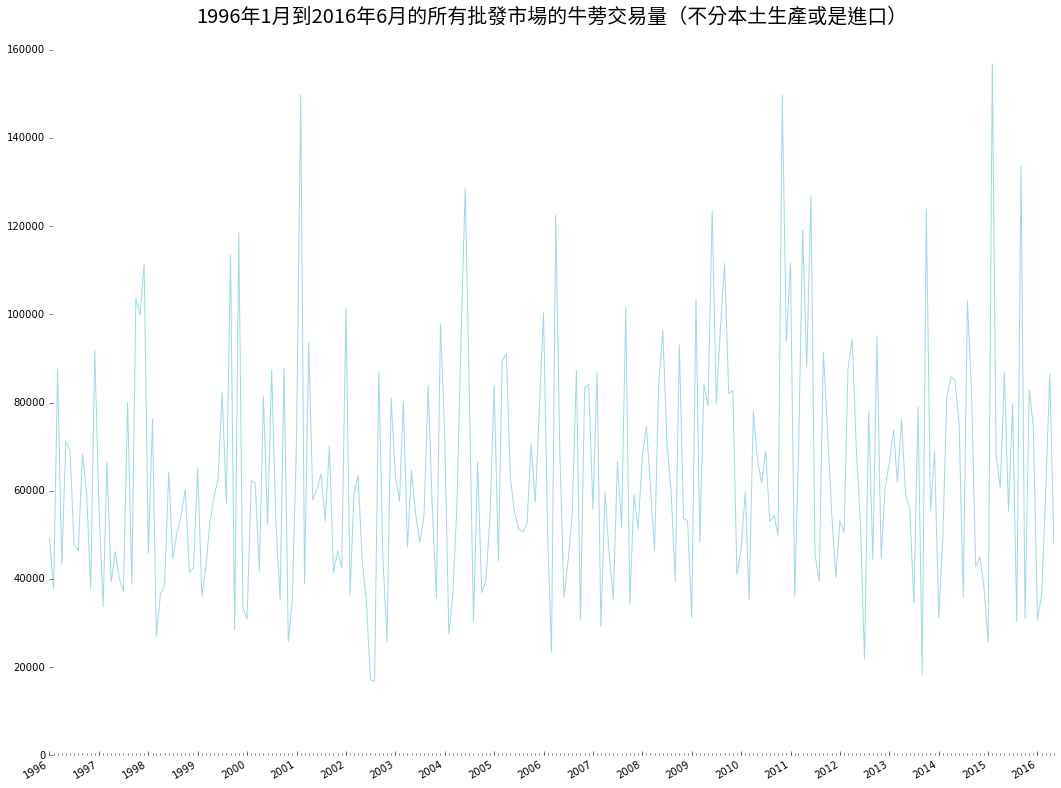

In [26]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

#所有市場的「總交易」量圖表
%matplotlib inline
import numpy
import collections
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
class SortedDisplayDict(dict):#http://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key
   def __str__(self):
       return "{" + ", ".join("%r: %r" % (key, self[key]) for key in sorted(self)) + "}"
market = {'104':'台北二', '109':'台北一', '241':'三重市', '260':'宜蘭市', '420':'豐原鄉', '512':'永靖鄉', '514':'溪湖鎮', '540':'南投市', '648':'西螺鎮', '900':'屏東市', '400':'台中市', '800':'高雄市', '830':'鳳山市', '338':'桃園縣', '930':'台東市', '950':'花蓮市'}
market_data = market.copy()
for num in market_data.keys():
    market_data[num] = []

##資料建立
for data in data_list:
    with open(data, 'r') as fout:
        udata = json.load(fout)
    for data in udata:
        if data['crs'] != 'rest':#不載入休市資料
            littletime = datetime.date(int(data['dat'].split('.')[0])+1911, int(data['dat'].split('.')[1]), int(data['dat'].split('.')[2]))
            market_data[data['mas']].append({'dat':littletime, 'pru':data['pru'], 'pro':data['pro'], 'prd':data['prd'], 'prm':data['prm'], 'trv':data['trv'], 'cro':data['cro']})
for i in market_data.keys():#資料排序
    if len(market_data[i]) > 0:
        market_data[i].sort(key=operator.itemgetter('dat'))
for i in market_data.keys():
    if len(market_data[i]) > 0:
        for data in market_data[i]:
            data['dat'] = datetime.datetime.strftime(data['dat'], '%Y.%m')

##個別市場的不同天的「交易量」圖表
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')

##資料擷取
dat_list = []
dat_dic = {}
for i in market.keys():#先處理日期的問題
    if len(market_data[i]) > 0:#不是空資料者才列印
        for data in market_data[i]:
            if data['dat'] not in dat_list:
                dat_list.append(data['dat'])
                dat_dic[data['dat']] = []
dat_dic = SortedDisplayDict(dat_dic)#http://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key
for i in market.keys():
    if len(market_data[i]) > 0:
        for data in market_data[i]:
            dat_dic[data['dat']].append(float(data['trv']))
# print(dat_dic)
time_temp = []
trv_temp = []
for i, j in dat_dic.items():
    time_temp.append(md.date2num(datetime.datetime.strptime(i, '%Y.%m')))
    trv_temp.append(float(numpy.sum(j)))
time_temp.sort()
# print(prm_temp)
##畫出線條
fig, ax = plt.subplots(1, 1, figsize=(18, 14))
ax.plot_date(time_temp, trv_temp, '-', color = '#9edae5')
plt.title('1996年1月到2016年6月的所有批發市場的牛蒡交易量（不分本土生產或是進口）\n', fontproperties=FontProperties(fname=fpath, size=20), ha='center')#繪製圖片的標題#http://matplotlib.org/examples/pylab_examples/fonts_demo.html
#繪製格線方便使用者看
for y in range(10, maxdata, 1000):
    plt.plot(time_temp, [y] * len(time_temp), '--', lw=0.5, color='black', alpha=0.3)
#移除一些不必要的東西
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
##繪製圖表
ax.xaxis.set_major_locator(years)#設定大年份
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
##顯示圖表
fig.autofmt_xdate()
plt.show()
plt.close()

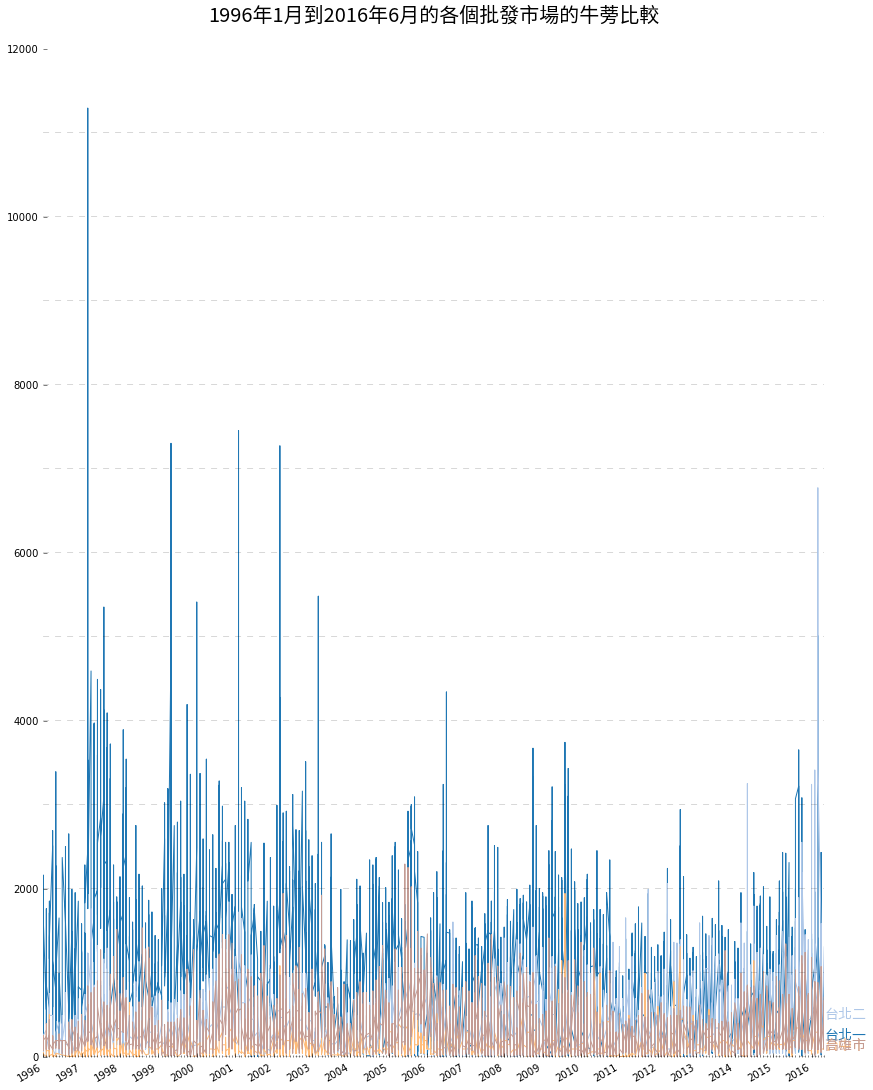

In [28]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

#不同市場的交易狀況－交易量
%matplotlib inline
import os
import numpy
import collections
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
market = {'104':'台北二', '109':'台北一', '241':'三重市', '260':'宜蘭市', '420':'豐原鄉', '512':'永靖鄉', '514':'溪湖鎮', '540':'南投市', '648':'西螺鎮', '900':'屏東市', '400':'台中市', '800':'高雄市', '830':'鳳山市', '338':'桃園縣', '930':'台東市', '950':'花蓮市'}
market_data = market.copy()
for num in market_data.keys():
    market_data[num] = []
majors = market.keys()
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']
#字型設定
if os.name == 'posix':#mac電腦的意思
    fpath = r"NotoSansCJKtc-Regular.otf"
else:#windows的電腦用
    fpath = r"NotoSansCJKtc-Regular.otf"
##資料建立
for data in data_list:
    with open(data, 'r') as fout:
        udata = json.load(fout)
    for data in udata:
        if data['crs'] != 'rest':#不載入休市資料
            littletime = datetime.date(int(data['dat'].split('.')[0])+1911, int(data['dat'].split('.')[1]), int(data['dat'].split('.')[2]))
            market_data[data['mas']].append({'dat':littletime, 'pru':data['pru'], 'pro':data['pro'], 'prd':data['prd'], 'prm':data['prm'], 'trv':data['trv']})
for i in market_data.keys():#資料排序
    if len(market_data[i]) > 0:
        market_data[i].sort(key=operator.itemgetter('dat'))#http://stackoverflow.com/questions/2589479/how-do-i-sort-this-list-in-python-if-my-date-is-in-a-string
for i in market_data.keys():
    if len(market_data[i]) > 0:
        for data in market_data[i]:
            data['dat'] = datetime.datetime.strftime(data['dat'], '%Y.%m')

#找最大值
temp = []
for i in market_data.keys():
    if len(market_data[i]) > 0:
        for j in market_data[i]:
            temp.append(float(j['trv']))
maxdata = int(str(max(temp)).split('.')[0])
##畫出線條
fig, ax = plt.subplots(1, 1, figsize=(14, 20))
for rank, column in enumerate(majors):#開始畫個別的線
    if len(market_data[column]) > 4000:
        time_temp = []
        trv_temp = []
        for i in market_data[column]:
            time_temp.append(md.date2num(datetime.datetime.strptime(i['dat'], '%Y.%m')))
            trv_temp.append(i['trv'])
        ax.plot_date(time_temp, trv_temp, '-', lw=1, color=color_sequence[rank])
        years = YearLocator()   # every year
        months = MonthLocator()  # every month
        yearsFmt = DateFormatter('%Y')
        #繪製線條旁邊的文字
        x_pos = float(time_temp[-1]) - 0.5
        y_pos = float(trv_temp[-1]) - 0.5
        plt.text(x_pos, y_pos, market[column], fontsize=14, fontproperties=FontProperties(fname=fpath, size=14), color=color_sequence[rank])
plt.title('1996年1月到2016年6月的各個批發市場的牛蒡比較\n', fontproperties=FontProperties(fname=fpath, size=20), ha='center')#繪製圖片的標題#http://matplotlib.org/examples/pylab_examples/fonts_demo.html
#移除一些不必要的東西
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
#繪製格線方便使用者看
for y in range(10, maxdata, 1000):
    plt.plot(time_temp, [y] * len(time_temp), '--', lw=0.5, color='black', alpha=0.3)
##繪製圖表
ax.xaxis.set_major_locator(years)#設定大年份
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
##顯示圖表
fig.autofmt_xdate()
plt.show()
plt.close()

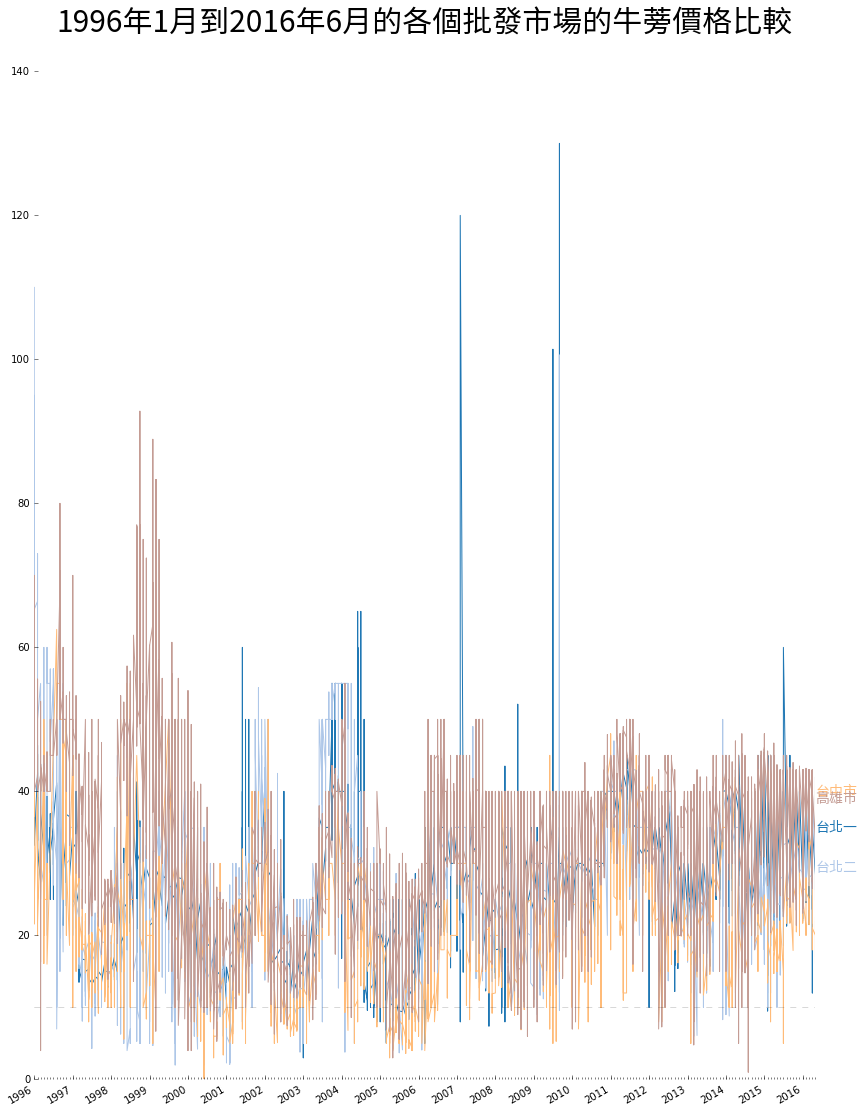

In [29]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

#不同市場的交易狀況－價格
%matplotlib inline
import os
import numpy
import collections
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
market = {'104':'台北二', '109':'台北一', '241':'三重市', '260':'宜蘭市', '420':'豐原鄉', '512':'永靖鄉', '514':'溪湖鎮', '540':'南投市', '648':'西螺鎮', '900':'屏東市', '400':'台中市', '800':'高雄市', '830':'鳳山市', '338':'桃園縣', '930':'台東市', '950':'花蓮市'}
market_data = market.copy()
for num in market_data.keys():
    market_data[num] = []
majors = market.keys()
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']
#字型設定
if os.name == 'posix':#mac電腦的意思
    fpath = r"NotoSansCJKtc-Regular.otf"
else:#windows的電腦用
    fpath = r"NotoSansCJKtc-Regular.otf"
##資料建立
for data in data_list:
    with open(data, 'r') as fout:
        udata = json.load(fout)
    for data in udata:
        if data['crs'] != 'rest':#不載入休市資料
            littletime = datetime.date(int(data['dat'].split('.')[0])+1911, int(data['dat'].split('.')[1]), int(data['dat'].split('.')[2]))
            market_data[data['mas']].append({'dat':littletime, 'pru':data['pru'], 'pro':data['pro'], 'prd':data['prd'], 'prm':data['prm'], 'trv':data['trv']})
for i in market_data.keys():#資料排序
    if len(market_data[i]) > 0:
        market_data[i].sort(key=operator.itemgetter('dat'))#http://stackoverflow.com/questions/2589479/how-do-i-sort-this-list-in-python-if-my-date-is-in-a-string
for i in market_data.keys():
    if len(market_data[i]) > 0:
        for data in market_data[i]:
            data['dat'] = datetime.datetime.strftime(data['dat'], '%Y.%m')

#找最大值
temp = []
for i in market_data.keys():
    if len(market_data[i]) > 0:
        for j in market_data[i]:
            temp.append(float(j['prm']))
maxdata = int(str(max(temp)).split('.')[0])
##畫出線條
fig, ax = plt.subplots(1, 1, figsize=(14, 20))
for rank, column in enumerate(majors):#開始畫個別的線
    if len(market_data[column]) > 4000:
        time_temp = []
        prm_temp = []
        for i in market_data[column]:
            time_temp.append(md.date2num(datetime.datetime.strptime(i['dat'], '%Y.%m')))
            prm_temp.append(i['prm'])
        ax.plot_date(time_temp, prm_temp, '-', lw=1, color=color_sequence[rank])
        years = YearLocator()   # every year
        months = MonthLocator()  # every month
        yearsFmt = DateFormatter('%Y')
        #繪製線條旁邊的文字
        x_pos = float(time_temp[-1]) - 0.5
        y_pos = float(prm_temp[-1]) - 0.5
        plt.text(x_pos, y_pos, market[column], fontsize=14, fontproperties=FontProperties(fname=fpath, size=14), color=color_sequence[rank])
plt.title('1996年1月到2016年6月的各個批發市場的牛蒡價格比較\n', fontsize=30, fontproperties=FontProperties(fname=fpath, size=20), ha='center')#繪製圖片的標題#http://matplotlib.org/examples/pylab_examples/fonts_demo.html
#移除一些不必要的東西
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
#繪製格線方便使用者看
for y in range(10, maxdata, 1000):
    plt.plot(time_temp, [y] * len(time_temp), '--', lw=0.5, color='black', alpha=0.3)
##繪製圖表
ax.xaxis.set_major_locator(years)#設定大年份
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
##顯示圖表
fig.autofmt_xdate()
plt.show()
plt.close()

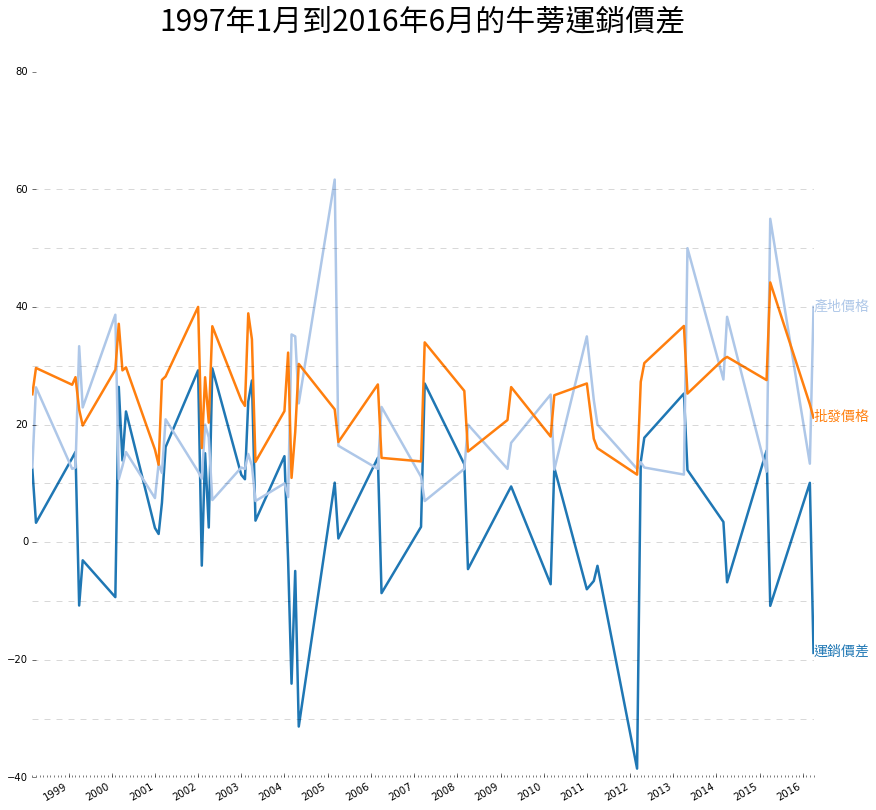

In [30]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

#產地價格與農產品批發市場價格差（運銷價差），算月
#只有收成的季節才會有產地價格
#資料搜集的起始年份和農產品的價格不同，需要從1997年開始看
%matplotlib inline
import os
import csv
import datetime
import collections
from itertools import islice
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
class SortedDisplayDict(dict):#http://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key
   def __str__(self):
       return "{" + ", ".join("%r: %r" % (key, self[key]) for key in sorted(self)) + "}"
#設定資料
newdata = {}
title = ['crs', 'mas', 'dat', 'pru', 'pro', 'prd', 'prm', 'trv']
months = {1:'01', 2:'02', 3:'03', 4:'04', 5:'05', 6:'06', 7:'07', 8:'08', 9:'09', 10:'10', 11:'11', 12:'12'}
url = 'pro_pla_price/month_data.csv'
with open(url, 'r') as fin:
    AQdata = fin.read()
market = {'104':'台北二', '109':'台北一', '241':'三重市', '260':'宜蘭市', '420':'豐原鄉', '512':'永靖鄉', '514':'溪湖鎮', '540':'南投市', '648':'西螺鎮', '900':'屏東市', '400':'台中市', '800':'高雄市', '830':'鳳山市', '338':'桃園縣', '930':'台東市', '950':'花蓮市'}
market_data = market.copy()
for num in market_data.keys():
    market_data[num] = []
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']
#字型設定
if os.name == 'posix':#mac電腦的意思
    fpath = r"NotoSansCJKtc-Regular.otf"
else:#windows的電腦用
    fpath = r"NotoSansCJKtc-Regular.otf"
##資料擷取
rowslist = AQdata.split('\n')#把資料換行的時候，當作是切成不同筆資料的分界點，成為多行資料形成的list，一行視為一筆資料
for rows in islice(rowslist, 1, None):#rows = dat,prm，型態為str，而row = [dat,prm]，型態為list
    row = rows.split(',')#要做切開的動作才會變成list
    row[0] = row[0].replace(' ', '')#有空白在當中，會影響辨識，所以要拿掉
    date = row[0].split('.')[0] + '.' +months[int(row[0].split('.')[1])]
    row[1] = row[1].replace(' ', '')#有空白在當中，會影響辨識，所以要拿掉
    if row[1] != 'none':
        newdata[date] = float(row[1])
##資料建立
for data in data_list:
    with open(data, 'r') as fout:
        udata = json.load(fout)
    for data in udata:
        if data['crs'] != 'rest':#不載入休市資料
            littletime = datetime.date(int(data['dat'].split('.')[0])+1911, int(data['dat'].split('.')[1]), int(data['dat'].split('.')[2]))
            market_data[data['mas']].append({'dat':littletime, 'pru':data['pru'], 'pro':data['pro'], 'prd':data['prd'], 'prm':data['prm'], 'trv':data['trv']})
for i in market_data.keys():#資料排序
    if len(market_data[i]) > 0:
        market_data[i].sort(key=operator.itemgetter('dat'))
for i in market_data.keys():
    if len(market_data[i]) > 0:
        for data in market_data[i]:
            data['dat'] = datetime.datetime.strftime(data['dat'], '%Y.%m')

dat_dic = newdata.copy()
for i in dat_dic.keys():
    dat_dic[i] = []
dat_dic = SortedDisplayDict(dat_dic)

for i in market.keys():
    if len(market_data[i]) > 0:#不是空資料者才列印
        for data in market_data[i]:
            newdate = data['dat'].split('.')[0] + data['dat'].split('.')[1]
            if data['dat'] in newdata.keys():
                dat_dic[data['dat']].append(float(data['prm']))
for i in dat_dic.keys():
    dat_dic[i] = sum(float(a) for a in dat_dic[i])/len(dat_dic[i])
#做價差運算：所有批發市場平均價格減去產地價格
delta = newdata.copy()
for i in delta.keys():
    delta[i] = ''
delta = SortedDisplayDict(delta)
for i in dat_dic.keys():
    for j in newdata.keys():
        if i == j:
            delta[i] = dat_dic[i] - newdata[j]
#找最大值
maxdata = int(str(max(newdata.values())).split('.')[0])
mindata = int(str(min(delta.values())).split('.')[0])
bigdata = {'批發價格':dat_dic, '產地價格':newdata, '運銷價差':delta}
##畫出線條
fig, ax = plt.subplots(1, 1, figsize=(14, 14))
for rank, column in enumerate(bigdata.keys()):
    time_temp = []
    pde_temp = []
    for i in bigdata[column].keys():
        time_temp.append(md.date2num(datetime.datetime.strptime(i, '%Y.%m')))
        pde_temp.append(bigdata[column][i])
    time_temp.sort()
    ax.plot_date(time_temp, pde_temp, '-', lw=2.5, color=color_sequence[rank])
    years = YearLocator()   # every year
    months = MonthLocator()  # every month
    yearsFmt = DateFormatter('%Y')
    x_pos = float(time_temp[-1]) - 0.5
    y_pos = float(pde_temp[-1]) - 0.5
    plt.text(x_pos, y_pos, list(bigdata.keys())[rank], fontsize=14, fontproperties=FontProperties(fname=fpath, size=14), color=color_sequence[rank])
plt.title('1997年1月到2016年6月的牛蒡運銷價差\n', fontsize=30, fontproperties=FontProperties(fname=fpath, size=20), ha='center')#繪製圖片的標題#http://matplotlib.org/examples/pylab_examples/fonts_demo.html
#移除一些不必要的東西
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
#繪製格線方便使用者看
for y in range(-40, 70, 10):
    plt.plot(time_temp, [y] * len(time_temp), '--', lw=0.5, color='black', alpha=0.3)
##繪製圖表
ax.xaxis.set_major_locator(years)#設定大年份
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
##顯示圖表
fig.autofmt_xdate()
plt.show()
plt.close()